In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as pp
from skimage.measure import find_contours
from utilities import *

# Version 1
only draw contours as they are and calculate the average char size per image

A: is for using extract_textarea function 
B: is for using the thresholded image directly

In [41]:
def character_size(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    sizes = np.zeros(0)
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        size = w*h
        if (size<500000):
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            sizes = np.append(sizes, size)
    if(len(sizes)) != 0:
        return np.mean(sizes)
    else:
        return 0



Note:
- I tried to use skimage contours retrieved from the extract_textarea() function using this method:
* cv_contour = cv2_contour(contour)
- Couldn't handle it, maybe because the image is cropped and the coordinates already changed 


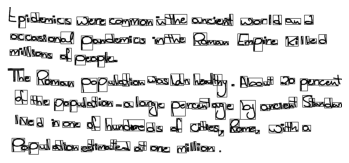

In [44]:
females_A = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        thresh = threshold_image(img)
        text = extract_textarea(thresh)
        avg = character_size(text)
        females_A.append(avg)
show_image(text)




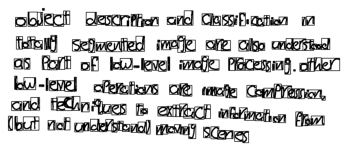

In [45]:
males_A = []
for filename in os.listdir("data/Males"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Males/" + filename)
        thresh = threshold_image(img)
        text = extract_textarea(thresh)
        avg = character_size(text)
        males_A.append(avg)

show_image(text)



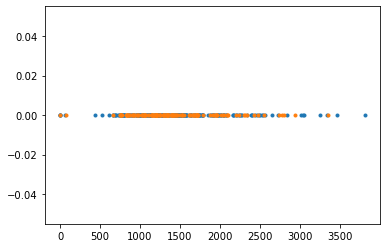

In [46]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()


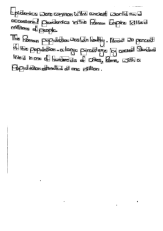

In [47]:
females_B = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        thresh = threshold_image(img)
        avg = character_size(thresh)
        females_B.append(avg)


show_image(thresh)


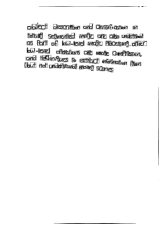

In [48]:
males_B = []
for filename in os.listdir("data/Males"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Males/" + filename)
        thresh = threshold_image(img)
        avg = character_size(thresh)
        males_B.append(avg)

show_image(thresh)



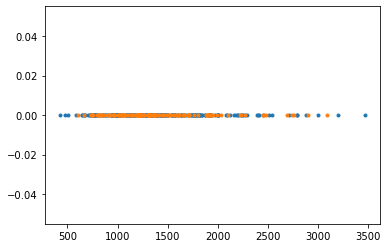

In [49]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_B # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_B # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()


# Version 2
draw contours but ignore sizes < 10 && >100

In [50]:
def character_size_2(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    sizes = np.zeros(0)
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        size = w*h
        if (size > 100 ) and (size<10000) :
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,(size / 10000) * 255,0), 2)
            sizes = np.append(sizes, size)
    if(len(sizes)) != 0:
        return np.mean(sizes)
    else:
        return 0



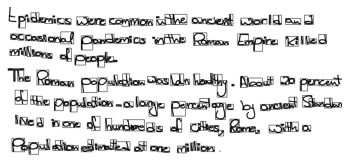

In [51]:
females_2_A = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        thresh = threshold_image(img)
        text = extract_textarea(thresh)
        avg = character_size_2(text)
        females_A.append(avg)

show_image(text)



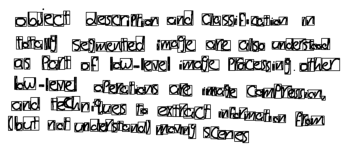

In [52]:
males_2_A = []
for filename in os.listdir("data/Males"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Males/" + filename)
        thresh = threshold_image(img)
        text = extract_textarea(thresh)
        avg = character_size_2(text)
        males_A.append(avg)

show_image(text)



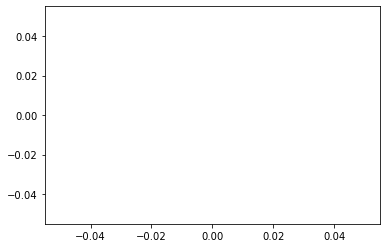

In [53]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_2_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_2_A # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()


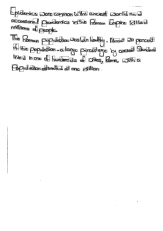

In [54]:
females_2_B = []
for filename in os.listdir("data/Females"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Females/" + filename)
        thresh = threshold_image(img)
        avg = character_size_2(thresh)
        females_B.append(avg)

show_image(thresh)



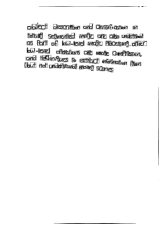

In [55]:
males_2_B = []
for filename in os.listdir("data/Males"):
    if filename.endswith(".jpg"):
        img = cv2.imread("data/Males/" + filename)
        thresh = threshold_image(img)
        avg = character_size(thresh)
        males_2_B.append(avg)

show_image(thresh)



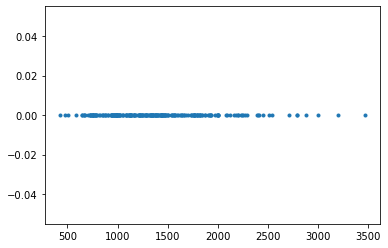

In [56]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = males_2_B # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')
ar = females_2_B # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, '.')

pp.show()
